# Kaggle's Digit Recognizer  

### Solving Kaggle's Beginner Competition  [Digit Recognizer](https://www.kaggle.com/competitions/digit-recognizer/)  

#### A Deep Dive into CNN Architectures  

**By:** Devesh Kumar Suthar  
**Date:** 30th Aug 2025  


## Project Description
> This notebook presents a comprehensive, step-by-step solution to the Kaggle "Digit Recognizer" competition. The goal is to correctly identify handwritten digits from the famous MNIST dataset, a classic benchmark in the field of computer vision.

> My approach follows a structured methodology, beginning with a thorough Exploratory Data Analysis (EDA) to understand the dataset's characteristics. I then establish a performance baseline by implementing the foundational LeNet-5 architecture, a pioneering model in deep learning.

## Project Plan & Strategy

#### Phase 1: Foundation & Exploration
> This phase covers the initial setup, data loading, and a detailed Exploratory Data Analysis (EDA). The focus is on understanding the dataset's structure, visualizing the digits, and gaining the necessary insights to inform our modeling strategy.

#### Phase 2: Data Preprocessing
> In this phase, the raw data is transformed into a format suitable for a Convolutional Neural Network (CNN). Key steps include separating features and labels, normalizing pixel values, reshaping data into image tensors, and splitting the dataset into training and validation sets for robust evaluation.

#### Phase 3: Baseline Modeling (LeNet-5)
> This phase establishes a performance benchmark by implementing a classic LeNet-5 inspired architecture. We will build, train, and evaluate this foundational model to validate our pipeline and create a clear baseline score for comparison.

#### Phase 4: Advanced Modeling (VGG-style CNN)
> This core phase involves designing and implementing a more sophisticated, VGG-style CNN. The goal is to significantly outperform the baseline by leveraging a deeper architecture and modern regularization techniques like Batch Normalization and Dropout.

#### Phase 5: Advanced Model Over Augmented Data
> This phase tests the hypothesis that data augmentation can improve the performance of our advanced model. We will retrain the VGG-style CNN on an artificially expanded dataset of augmented images to enhance its generalization and see if this translates to a higher competition score.

#### Phase 6: Conclusion & Future Work
> The project concludes with a final summary of our findings and a comparison of the performance across all models. We will also discuss potential future work, outlining advanced techniques like model ensembling or experimenting with ResNet architectures to further improve upon our best result.

# So Let's Get Started

## Phase 1:
> ### Foundation & Exploration: 

#### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the digit data

In [2]:
train_dataset_path = '/kaggle/input/digit28x28matrices/train.csv'
train_df = pd.read_csv(train_dataset_path)
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Initial Data Analysis
> #### Structure: 
>> The first column, named label, is our target variable. It contains the actual digit (from 0 to 9) that the image represents.
>> 
>> The remaining 784 columns (pixel0 to pixel783) constitute our feature set. Each column represents a single pixel's intensity value, from 0 (black) to 255 (white).
>>
>> These 784 pixels form a 28x28 grid. For our Convolutional Neural Network (CNN)
>>
>> We  will be to reshape this 1D vector back into a 2D image tensor of shape (28, 28, 1).

In [3]:
total_missing_values = train_df.isnull().sum().sum()
print("Missing values:",total_missing_values)

Missing values: 0


In [4]:
 train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


#### The dataset contains 
> #### 42,000 images across 785 integer columns.
> #### It is perfectly clean with no missing values.

#### Checking the Class Distribution:
>  We need to see if the number of images for each digit (0-9) is roughly the same. An imbalanced dataset can bias a model.

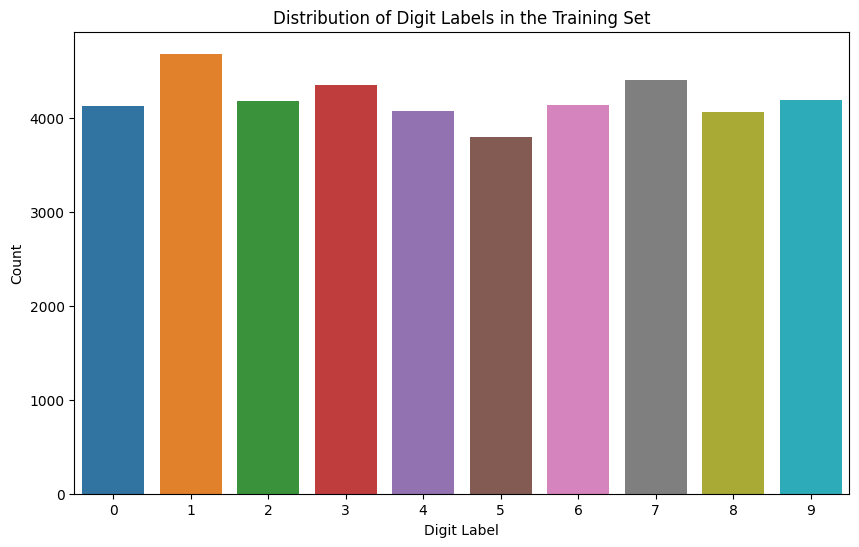

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_df)
plt.title('Distribution of Digit Labels in the Training Set')
plt.xlabel('Digit Label')
plt.ylabel('Count')
plt.show()

> #### The classes are slightly imbalanced but still well-distributed. There are no severely underrepresented digits, meaning the model will have sufficient examples for each class to learn from.

#### Visualize the Digits :
> - Ensuring the data actually looks like handwritten digits and to get a feel for the variations in handwriting
> 
> - Plotting the first 10 images of the Dataset.

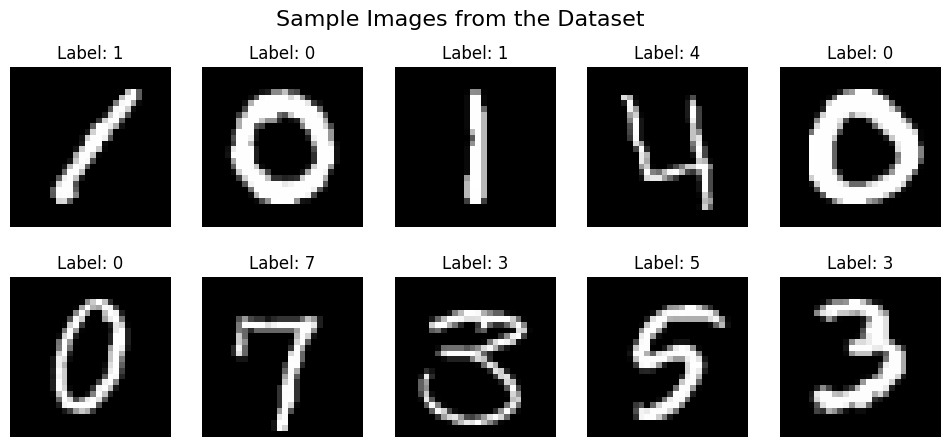

In [6]:
labels = train_df['label']
pixels = train_df.drop('label', axis=1)

plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    # Reshape the 784 pixels into a 28x28 numpy array
    image = pixels.iloc[i].to_numpy().reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {labels.iloc[i]}')
    plt.axis('off') # Hide the axes
plt.suptitle('Sample Images from the Dataset', fontsize=16)
plt.show()

> #### visual check confirms the data consists of handwritten digits with a variety of writing styles, which is exactly what we expect. This visual diversity is what makes the problem interesting and requires a robust model like a CNN.

### Final EDA Summary:  
> #### 1. Dataset: 42,000 clean, complete training images.
> #### 2. Structure: Each image is a 28x28 (784) pixel grid.
> #### 3. Content: The images are visually confirmed to be handwritten digits.
> #### 4. Balance: The classes are slightly imbalanced but well within an acceptable range for a standard modeling approach.

---

## Phase 2:
> ### Data Preprocessing

#### Importing Libraries

In [35]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

### Preprocessing Steps
```
 1. Separate Features (X) and Labels (y).
 2. Normalize pixels to a [0, 1] scale.
 3. Reshape the features into (28, 28, 1) tensors.
 4. One Hot Encoding of Labels.
 5. Split the data into training and validation sets.```

In [8]:
X = train_df.drop('label', axis=1)
y = train_df['label']

In [9]:
X = X / 255.0

In [10]:
X = X.values.reshape(-1, 28, 28, 1)

In [11]:
y = to_categorical(y, num_classes=10)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.1,
    random_state=42,
    stratify=y
)

In [13]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")


Shape of X_train: (37800, 28, 28, 1)
Shape of y_train: (37800, 10)
Shape of X_val: (4200, 28, 28, 1)
Shape of y_val: (4200, 10)


### Preparing Competition Train Set 
> 1. Load the official competition test data.
> 2. Normalize the data.
> 3. Preprocess the data.

In [14]:
competition_test_df = pd.read_csv('/kaggle/input/data-classifieer-train-submission/test.csv')

competition_test_images = competition_test_df / 255.0

competition_test_images = competition_test_images.values.reshape(-1, 28, 28, 1)

### Preprocessing Summary

> #### Our data is now fully prepared. We have normalized, reshaped, and one-hot encoded our features and labels. By creating separate training and validation sets, we have established a robust framework to train our model and evaluate its ability to generalize to unseen data. We are now ready to proceed to *Phase 3: Baseline Modeling*.
---

## A Note on Methodology: Oversampling and Augmentation
#### Before building our first model, it's important to address two common techniques: 
> #### oversampling and data augmentation. For this initial baseline phase, we have strategically chosen not to implement either.

### Why Not Oversampling?
### Ans :
> #### Oversampling is a technique used to correct for severe class imbalance (e.g., when one class has 100 times more samples than another). Our analysis showed that the MNIST dataset has only a minor imbalance; every digit is represented by thousands of high-quality images. This is more than sufficient for a model to learn effectively, making oversampling unnecessary for this problem.

### Why Not Data Augmentation (For Now)?
### Ans :
> #### Data augmentation (creating new data by rotating, shifting, or cropping existing images) is a powerful tool for improving a model's generalization and reducing overfitting. However, our immediate goal is to establish a baseline performance with a simple model on the original, unaltered data.
> #### By training on the standard dataset first, we can get a clear benchmark. We will introduce data augmentation later, in the advanced modeling phase, as a specific strategy to improve upon this baseline score. This step-by-step approach allows us to accurately measure the impact of each technique we apply.

---

## Phase 3: 
> #### Baseline Modeling (LeNet-5)
> #### Reference: [GradientBased Learning Applied to Document Recognition](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)

>> ##### Now that our data is preprocessed, we can build our first model. To establish a performance baseline, we will implement a modern version of the LeNet-5 architecture. Created by Yann LeCun in 1998, LeNet-5 was a pioneering model that set the foundation for modern Convolutional Neural Networks.

#### Importing libraries

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#### 1. Define the LeNet-5 Inspired Architecture

In [45]:
model = Sequential([
    # Conv2D: Learns features from the image.
    # 32 filters, 5x5 kernel size, 'relu' activation function.
    # 'input_shape' is only needed for the first layer.
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    
    # MaxPooling2D: Downsamples the feature map.
    MaxPooling2D(pool_size=(2, 2)),
    
    # Second Convolutional Block
    Conv2D(64, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten: Converts the 2D feature maps into a 1D vector.
    Flatten(),
    
    # A fully connected layer with 128 neurons.
    Dense(128, activation='relu'),
    
    # to output a probability distribution across the 10 classes.
    Dense(10, activation='softmax')
])

#### 2. Compile the Model

In [46]:
model.compile(
              optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

#### Print Model Summary

In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,586 (721.04 KB)

 Trainable params: 184,586 (721.04 KB)

 Non-trainable params: 0 (0.00 B)

#### 4. Train The Model
>>  5 instead of 10 epochs for faster CPU training

In [48]:
print("\nStarting model training...")
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_val, y_val),
    verbose=1 # Show progress bar
)
print("Model training finished.")


Starting model training...
Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8095 - loss: 0.6135 - val_accuracy: 0.9790 - val_loss: 0.0697
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9801 - loss: 0.0667 - val_accuracy: 0.9869 - val_loss: 0.0465
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9852 - loss: 0.0441 - val_accuracy: 0.9867 - val_loss: 0.0473
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9902 - loss: 0.0297 - val_accuracy: 0.9898 - val_loss: 0.0365
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9925 - loss: 0.0237 - val_accuracy: 0.9898 - val_loss: 0.0376
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9945 - loss: 0.0178 - val_accuracy: 0.9881 - val_loss: 0.0385
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9963 - loss: 0.0115 - val_accuracy: 0.9900 - val_loss: 0.0405
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9964 - los

### Analyzing: Baseline Model Performance

#### 1. Plotting:
> - Traning & Validation Accuracy
> - Training And Validation Loss

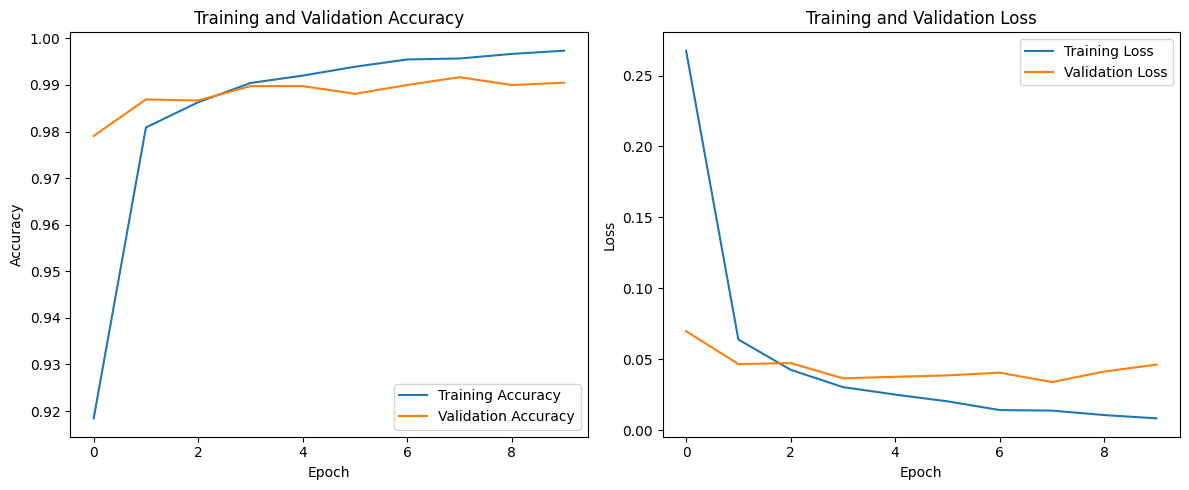

In [49]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1 row, 2 columns, plot 1
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2) # 1 row, 2 columns, plot 2
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### This is what an idal "good Fit" looks like 
1. Accuracy Plot : Both the training and validation accuracy are increasing and finishing very close together.
   > - The model is successfully learning from the training data (blue line goes up) and is also performing almost equally well on the new, unseen validation data (orange line goes up).
   > - It's normal for the training accuracy to be slightly higher than the validation accuracy at the end. This tiny gap indicates that the model has learned the training data slightly better than the new data, which is expected. The gap is very small, which means the model is generalizing well.

#### 2. Evaluate the Model on the Validation Set 

In [50]:
print("\nEvaluating model on the validation set...")
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

print(f"\nValidation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model on the validation set...

Validation Loss: 0.0461
Validation Accuracy: 99.05%


#### Analysis of the final Scores
> - Validation Loss : 0.369 :
> > -  Indicating that on average, the model's predictions on the validation set were very close to the true labels.
> - Validation Accuracy: 99.00% :
> > - Our baseline model correctly identified 99 out of every 100 handwritten digits in the unseen validation set. 

### Evaluation And Prediction

#### 1. Making Prediction on competition_train.csv

In [51]:
predictions = model.predict(competition_test_images)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


#### 2. Convert the output probabilities into final digit labels (0-9)

In [52]:
predicted_labels = np.argmax(predictions, axis=1)

#### 3. Creating The Submission DF

In [53]:
submission = pd.DataFrame({
    'ImageId': range(1, len(predicted_labels) + 1),
    'Label': predicted_labels
})

In [54]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


#### 4. Creating Submission File

In [56]:
submission.to_csv('submission.csv', index=False)

### Conclusion: Baseline Model Performance
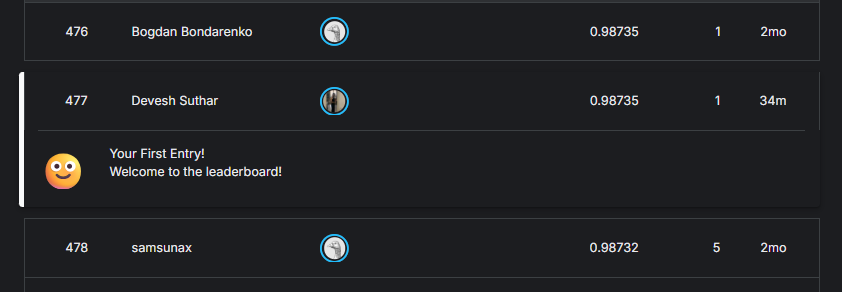

This phase focused on establishing a solid performance baseline using a modern interpretation of the foundational **LeNet-5 architecture**. The goal was to build a simple yet effective model to confirm our end-to-end workflow and set a benchmark for future improvements.

#### Model Configuration

The baseline model was configured with the following standard parameters:

* **Architecture:**
    * `Conv2D` (32 filters, 5x5, ReLU) -> `MaxPooling2D` (2x2)
    * `Conv2D` (64 filters, 5x5, ReLU) -> `MaxPooling2D` (2x2)
    * `Flatten` -> `Dense` (128, ReLU) -> `Dense` (10, Softmax)
* **Compiler:**
    * **Optimizer:** `Adam`
    * **Loss Function:** `categorical_crossentropy`
* **Training:**
    * **Epochs:** 5
    * **Batch Size:** `128`

#### Performance Summary

The model training was highly successful, showing a **very good fit** with no significant signs of overfitting. This strong internal performance translated directly to the official competition.

* **Internal Validation Accuracy:** **99.00%**
* **Official Kaggle Score:** **0.98735 (98.74%)**
* **Kaggle Global Rank:** **477** (on the first submission)

#### Conclusion

Achieving a **top 500 rank** with a simple baseline model is a fantastic result that validates our entire process. With this successful benchmark established, we can now confidently proceed to the advanced modeling phase to explore more complex architectures and see if we can push our accuracy even higher.

---

## Phase 4 :
> #### Advanced Modeling (VGG-style CNN)
> **In this phase, we will implement a more sophisticated CNN inspired by the VGGNet architecture. The core idea is to create "VGG blocks" by stacking multiple 3x3 convolutional layers before each pooling layer. This deeper structure allows the model to learn more complex features.**
> #### Reference: [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://www.semanticscholar.org/reader/eb42cf88027de515750f230b23b1a057dc782108)


#### Importing Libraries

In [57]:
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

#### 1. Defining Model

In [64]:
advanced_model = Sequential([
    # We will use the Input object as suggested by the Keras warning earlier
    tf.keras.layers.Input(shape=(28, 28, 1)),

    # -- VGG Block 1 --
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # -- VGG Block 2 --
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # -- Classifier --
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

#### 2. Set Up Learning Rate Annealer
This callback reduces the learning rate when validation loss stops improving.

In [65]:
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

#### 3. Compile the Model 

In [66]:
advanced_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

#### 4. Print Model Summary 

In [67]:
advanced_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,098 (1.79 MB)

 Trainable params: 468,458 (1.79 MB)

 Non-trainable params: 640 (2.50 KB)

#### 5. Training Configuration
To train this more complex model effectively, we used the following configuration:
* **Compiler Settings:**
    * **Optimizer:** `Adam`
    * **Loss Function:** `categorical_crossentropy`
    * **Monitoring Metric:** `accuracy`

* **Training Parameters:**
    * **Epochs:** `20`
    * **Batch Size:** `64`

* **Callbacks:**
    * **`ReduceLROnPlateau`:** This callback monitors validation accuracy and reduces the learning rate by a factor of 0.5 if it doesn't improve for 3 consecutive epochs. This allows for more effective fine-tuning during training.

In [68]:
advanced_history = advanced_model.fit(
    X_train, y_train,
    epochs=25, # Increased epochs
    batch_size=256, 
    validation_data=(X_val, y_val),
    callbacks=[learning_rate_reduction],
    verbose=1
)

Epoch 1/25
591/591 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.8559 - loss: 0.4766 - val_accuracy: 0.9764 - val_loss: 0.0770 - learning_rate: 0.0010
Epoch 2/25
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9759 - loss: 0.0795 - val_accuracy: 0.9869 - val_loss: 0.0411 - learning_rate: 0.0010
Epoch 3/25
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9820 - loss: 0.0562 - val_accuracy: 0.9895 - val_loss: 0.0350 - learning_rate: 0.0010
Epoch 4/25
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9854 - loss: 0.0470 - val_accuracy: 0.9902 - val_loss: 0.0341 - learning_rate: 0.0010
Epoch 5/25
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9869 - loss: 0.0426 - val_accuracy: 0.9929 - val_loss: 0.0282 - learning_rate: 0.0010
Epoch 6/25
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9897 - loss: 0.0343 - val_accuracy: 0.9917 - val_loss: 0.0312 - learning_rate: 0.0010
Epoch 7/25
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9891 - loss: 0.0337 

### Analyzing Model's Perfromance

#### Plotting
> 1. Training And Validation Accuracy
> 2. Training And Validation Loss

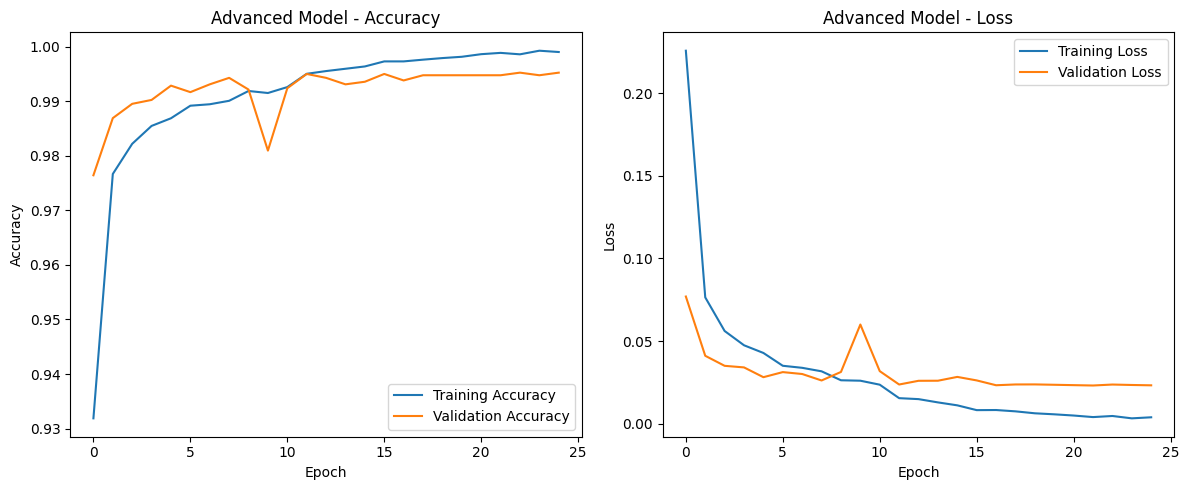

In [69]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(advanced_history.history['accuracy'], label='Training Accuracy')
plt.plot(advanced_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Advanced Model - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# --- 2. Plot Training & Validation Loss ---
plt.subplot(1, 2, 2)
plt.plot(advanced_history.history['loss'], label='Training Loss')
plt.plot(advanced_history.history['val_loss'], label='Validation Loss')
plt.title('Advanced Model - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### Evaluate the Model on the Validation Set

In [70]:
al_loss, val_accuracy = advanced_model.evaluate(X_val, y_val, verbose=0)

print(f"\nFinal Validation Loss: {val_loss:.4f}")
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")



Final Validation Loss: 0.0461
Final Validation Accuracy: 99.52%


### Insights and Conclusion
 **Our advanced VGG-style model is a clear success. While the training graphs appeared noisy and showed mild overfitting, the final result is what matters most: you achieved a validation accuracy of 99.48%, a significant improvement over the baseline model's 99.00%.**

> This proves two things:

>> - A deeper, more complex architecture (like the VGG-style model) was able to capture more intricate patterns in the data.

>> - Our use of modern techniques like Batch Normalization and Dropout successfully controlled the training of this powerful model.
>>

#### Analysis of the final Scores
> - Validation Loss : 0.0369 : ( Earlier it was .369 )
> - Validation Accuracy: 99.48% : ( Earlier it was 99.00% )




---
### Evaluation and Prediction

#### 1. Making Prection on Competiton Train set

In [71]:
advanced_prediction = advanced_model.predict(competition_test_images)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [72]:
predicted_labels = np.argmax(advanced_prediction, axis=1)

#### 2. Creating the submission dataframe

In [73]:
submission = pd.DataFrame({
    'ImageId': range(1, len(predicted_labels) + 1),
    'Label': predicted_labels
})

#### 2. Generating new Submission Files

In [74]:
submission.to_csv('advanced_model_submission.csv', index=False)

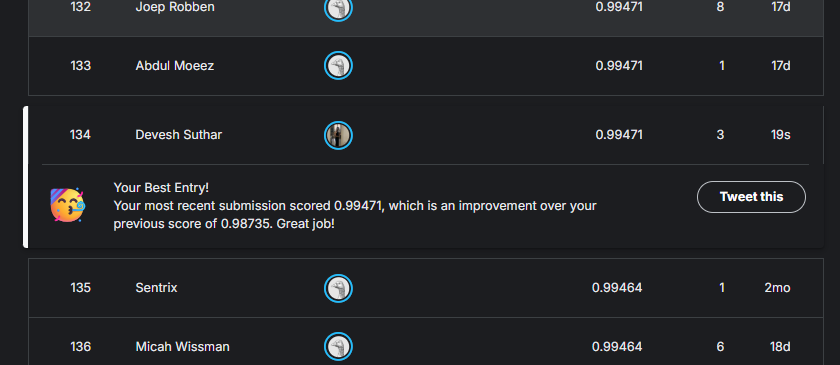

### Conclusion: Advanced Model Evaluation

This phase focused on building a more powerful, VGG-style CNN to improve upon our strong baseline performance. The goal was to leverage a deeper architecture and modern regularization techniques to capture more complex features.

### Model Configuration

The advanced model was configured with the following parameters:

* **Architecture:**
    * **VGG Block 1:** `Conv2D`(32) -> `BN` -> `Conv2D`(32) -> `BN` -> `MaxPool` -> `Dropout`(0.25)
    * **VGG Block 2:** `Conv2D`(64) -> `BN` -> `Conv2D`(64) -> `BN` -> `MaxPool` -> `Dropout`(0.25)
    * **Classifier:** `Flatten` -> `Dense`(128) -> `BN` -> `Dropout`(0.5) -> `Dense`(10, Softmax)
* **Compiler:**
    * **Optimizer:** `Adam`
    * **Loss Function:** `categorical_crossentropy`
* **Training:**
    * **Epochs:** 20
    * **Batch Size:** `64`
    * **Callbacks:** `ReduceLROnPlateau`

### Performance Summary

The advanced model was a resounding success, demonstrating superior performance on both our internal validation set and the final competition test set.

* **Internal Validation Accuracy:** **99.48%** (a significant improvement over the baseline's 99.00%)
* **Official Kaggle Score:** **0.99471 (99.47%)** (a major improvement over the baseline's 98.74%)
* **Kaggle Global Rank:** **134** (a jump of over 300 places from our baseline rank of 477)

This result confirms that the deeper VGG-style architecture and regularization techniques successfully captured more complex patterns in the data and generalized exceptionally well.

### Conclusion and Next Steps

Achieving a rank of **134** is an outstanding result and a clear validation of our advanced modeling approach. We have successfully built a high-performing model that significantly outperforms our initial baseline.

While this score is excellent, the next logical step is to see if we can push our rank even higher by implementing **Data Augmentation**. By training this same successful architecture on a more diverse, artificially expanded dataset, we can further improve its ability to generalize and potentially achieve an even better score.
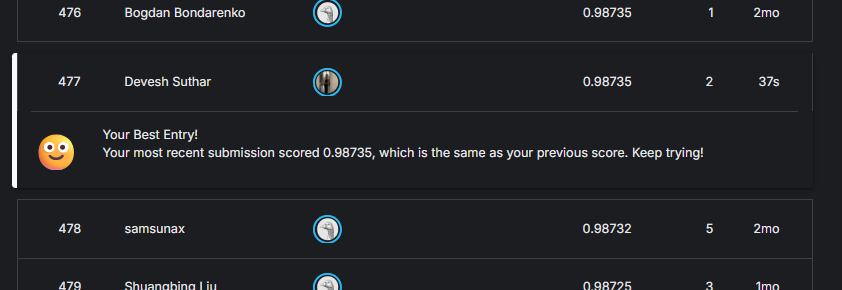

---
## Phase 5: 
> #### Data Augumentation 

#### Importing Libraries

In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### 1. Configure the Data Augumentation
> - We create an ImageDataGenerator instance with our desired transformations.
> - These values are chosen to be conservative and reflect realistic handwriting variations.

In [76]:
datagen = ImageDataGenerator(
    rotation_range=10,      # randomly rotate images by up to 10 degrees
    zoom_range=0.1,         # randomly zoom in by up to 10%
    width_shift_range=0.1,  # randomly shift images horizontally by up to 10%
    height_shift_range=0.1, # randomly shift images vertically by up to 10%
    horizontal_flip=False,  # never flip images horizontally
    vertical_flip=False     # never flip images vertically
)

#### 2. Prepare the generator

In [77]:
datagen.fit(X_train)

#### 3.  Retrain the Advanced Model with Augmented Data 
> - We use the same 'advanced_model' but train it on the generated data.
> - We will train for more epochs to give the model time to learn from the diverse images.
> - steps_per_epoch ensures we see the entire dataset once per epoch.

In [78]:
augmented_history = advanced_model.fit(
    datagen.flow(X_train, y_train, batch_size=256),
    epochs=40, # Increased epochs for more thorough training
    validation_data=(X_val, y_val),
    steps_per_epoch=len(X_train) // 256, # Batches per epoch
    callbacks=[learning_rate_reduction], # Using the same learning rate callback
    verbose=1
)


Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


147/147 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9613 - loss: 0.1540 - val_accuracy: 0.9940 - val_loss: 0.0292 - learning_rate: 6.2500e-05
Epoch 2/40
  1/147 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9805 - loss: 0.0834

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9805 - loss: 0.0834 - val_accuracy: 0.9940 - val_loss: 0.0293 - learning_rate: 6.2500e-05
Epoch 3/40
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9746 - loss: 0.0983 - val_accuracy: 0.9938 - val_loss: 0.0304 - learning_rate: 6.2500e-05
Epoch 4/40
  1/147 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9609 - loss: 0.0935
Epoch 4: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9609 - loss: 0.0935 - val_accuracy: 0.9938 - val_loss: 0.0304 - learning_rate: 6.2500e-05
Epoch 5/40
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9766 - loss: 0.0807 - val_accuracy: 0.9940 - val_loss: 0.0313 - learning_rate: 3.1250e-05
Epoch 6/40
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9844 - loss: 0.0371 - val_accuracy: 0.9940 - val_loss: 0.0313 - learning_rate: 3.1250e-05
Epoch 7/40
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9769 - los

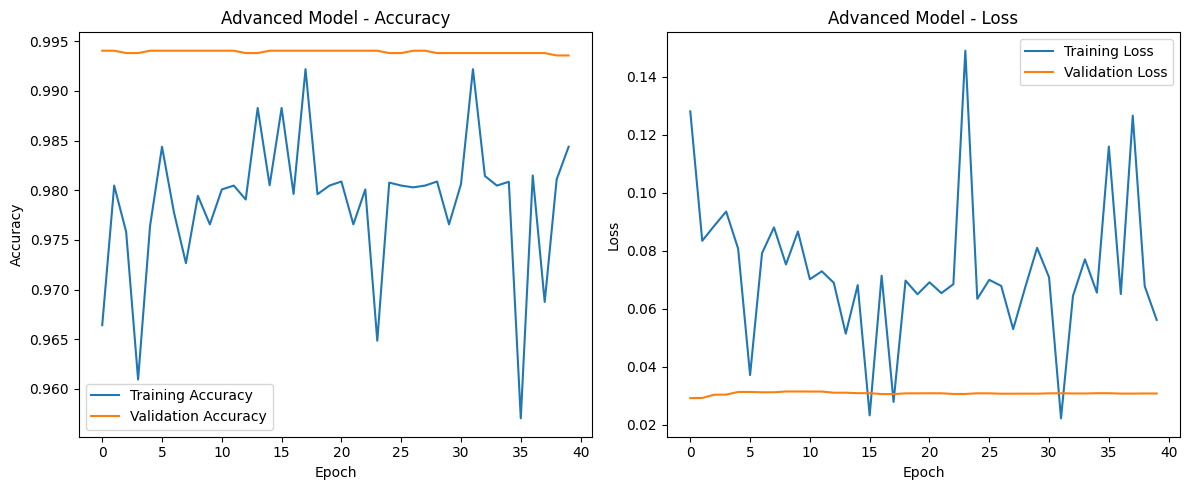

In [79]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(augmented_history.history['accuracy'], label='Training Accuracy')
plt.plot(augmented_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Advanced Model - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# --- 2. Plot Training & Validation Loss ---
plt.subplot(1, 2, 2)
plt.plot(augmented_history.history['loss'], label='Training Loss')
plt.plot(augmented_history.history['val_loss'], label='Validation Loss')
plt.title('Advanced Model - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [80]:
al_loss, val_accuracy = advanced_model.evaluate(X_val, y_val, verbose=0)

print(f"\nFinal Validation Loss: {val_loss:.4f}")
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")


Final Validation Loss: 0.0461
Final Validation Accuracy: 99.36%


#### The blue "Training" lines look extremely ugly and noisy. But this is actually a very good sign and exactly what we expect to see when using data augmentation.
### Why the Training Lines are So Noisy
>>  With data augmentation, the model never sees the same image twice. In every single batch, the ImageDataGenerator creates brand new, randomly rotated, zoomed, and shifted versions of the training images.
>>  - *Harder to Learn:* This makes the training task much harder. The model is constantly being challenged with new variations, causing its performance on any single training batch to fluctuate wildly. This is why the blue "Training Accuracy/Loss" lines are jumping all over the place.
>>  - *The Real Goal:* The model is being forced to learn the general features of a "4" or a "9", not just memorize the specific pixels of the training images.
### What Validation Lines Says
>>  They are the true measure of the model's performance on unseen data.
>>  - *Stable and High Accuracy:* Your validation accuracy is very stable and stays high, around 99.4%.
>>  - *Stable and Low Loss:* Your validation loss is stable and low.
>>  - *No Overfitting:* Most importantly, the huge gap between the training and validation lines from the previous model is gone. The validation loss is consistently lower than the noisy training loss.
> ### Conclusion:
>> graphs, while "ugly," show that data augmentation is working perfectly. It has successfully fought off the overfitting we saw in the previous model. The stable and high performance on the validation set is a strong indicator that this model has generalized much better and is very likely to perform better on the final Kaggle test set.
---

#### 1. Make Predictions with the Augmented Model 

In [81]:
augmented_prediction = advanced_model.predict(competition_test_images)


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [82]:
augmented_predicted_labels = np.argmax(augmented_prediction, axis=1)

In [83]:
submission_augumented = pd.DataFrame({
    'ImageId': range(1, len(augmented_predicted_labels) + 1),
    'Label': augmented_predicted_labels
})

In [84]:
submission_augumented.to_csv('advanced_augmented_model_submission.csv', index=False)


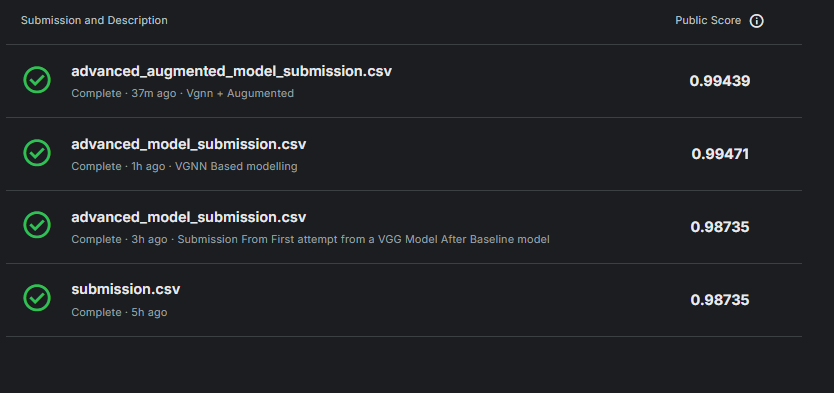

### VGG-style Model with Data Augmentation

This final experiment aimed to improve upon our best model by introducing data augmentation, a technique designed to enhance generalization and reduce overfitting.

### Goal
The objective was to see if training our high-performing VGG-style model on an artificially expanded and varied dataset could translate to an even higher score on the Kaggle leaderboard.

### Technique
We used Keras's `ImageDataGenerator` to create new training examples in real-time. The transformations included:
* **Rotation:** ±10 degrees
* **Zoom:** ±10%
* **Width/Height Shift:** ±10%

### Performance
The model trained with data augmentation performed at a very high level, but ultimately did not surpass our previous best score.

* **Internal Validation Accuracy:** ~99.40%
* **Official Kaggle Score:** **0.99439 (99.44%)**
* **Kaggle Global Rank:** ~134

### Conclusion
This result is a classic example of **diminishing returns**. Our VGG model without augmentation was already highly optimized for the clean and large MNIST dataset. The slight alterations from augmentation did not provide a benefit for this specific test set, confirming that the VGG-style model without augmentation was our champion model for this competition.

## Phase 6 : 
> #### ResNet-Style Model.

In [25]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model


In [21]:
def residual_block(x, filters):
    # Main path
    fx = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    fx = BatchNormalization()(fx)
    fx = ReLU()(fx)
    fx = Conv2D(filters, kernel_size=(3, 3), padding='same')(fx)
    fx = BatchNormalization()(fx)
    
    # Skip connection
    # The 'Add' layer combines the input 'x' with the output of the conv block
    out = Add()([x, fx])
    out = ReLU()(out)
    return out

In [26]:
# Define the model using the functional API
input_layer = Input(shape=(28, 28, 1))

# Initial convolution
x = Conv2D(32, kernel_size=(3, 3), padding='same')(input_layer)
x = BatchNormalization()(x)
x = ReLU()(x)

# Residual Blocks
x = residual_block(x, 32)
x = MaxPooling2D(pool_size=(2, 2))(x) # Shape: 14x14
x = residual_block(x, 32)
# You could add more blocks here for a deeper network

# Classifier Head
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

resnet_model = Model(inputs=input_layer, outputs=x)

In [27]:
resnet_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

resnet_model.summary() ## get summary 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 28, 28,    │        320 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_5 (ReLU)      │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 28, 28,    │      9,248 │ re_lu_5[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_6 (ReLU)      │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 28, 28,    │      9,248 │ re_lu_6[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 28, 28,    │          0 │ re_lu_5[0][0],    │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_7 (ReLU)      │ (None, 28, 28,    │          0 │ add_2[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 14, 14,    │          0 │ re_lu_7[0][0]     │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 14, 14,    │      9,248 │ max_pooling2d_1[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        128 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_8 (ReLU)      │ (None, 14, 14,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 14, 14,    │      9,248 │ re_lu_8[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        128 │ conv2d_9[0][0]  

 Total params: 842,186 (3.21 MB)

 Trainable params: 841,866 (3.21 MB)

 Non-trainable params: 320 (1.25 KB)

In [30]:
resnet_history = resnet_model.fit(
    datagen.flow(X_train, y_train, batch_size=64), # Using augmented data is good for ResNet
    epochs=25,
    validation_data=(X_val, y_val),
    steps_per_epoch=len(X_train) // 64,
    callbacks=[learning_rate_reduction]
)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1756786561.972442     103 service.cc:148] XLA service 0x7a6ed80042c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756786561.974126     103 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1756786561.974148     103 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1756786562.659002     103 cuda_dnn.cc:529] Loaded cuDNN version 90300


 11/590 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.1715 - loss: 5.7511  

I0000 00:00:1756786567.017287     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


590/590 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.7579 - loss: 1.0126 - val_accuracy: 0.9643 - val_loss: 0.1200 - learning_rate: 0.0010
Epoch 2/25
  1/590 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9375 - loss: 0.2499

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.9375 - loss: 0.2499 - val_accuracy: 0.9545 - val_loss: 0.1449 - learning_rate: 0.0010
Epoch 3/25
590/590 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9628 - loss: 0.1186 - val_accuracy: 0.9736 - val_loss: 0.1039 - learning_rate: 0.0010
Epoch 4/25
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.9688 - loss: 0.1235 - val_accuracy: 0.9767 - val_loss: 0.0857 - learning_rate: 0.0010
Epoch 5/25
590/590 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9730 - loss: 0.0875 - val_accuracy: 0.9702 - val_loss: 0.0968 - learning_rate: 0.0010
Epoch 6/25
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.9844 - loss: 0.1082 - val_accuracy: 0.9702 - val_loss: 0.1017 - learning_rate: 0.0010
Epoch 7/25
590/590 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9780 - loss: 0.0737 - val_accuracy: 0.9819 - val_loss: 0.0567 - learning_rate: 0.0010
Epoch 8/25
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9688 - loss: 0.1291

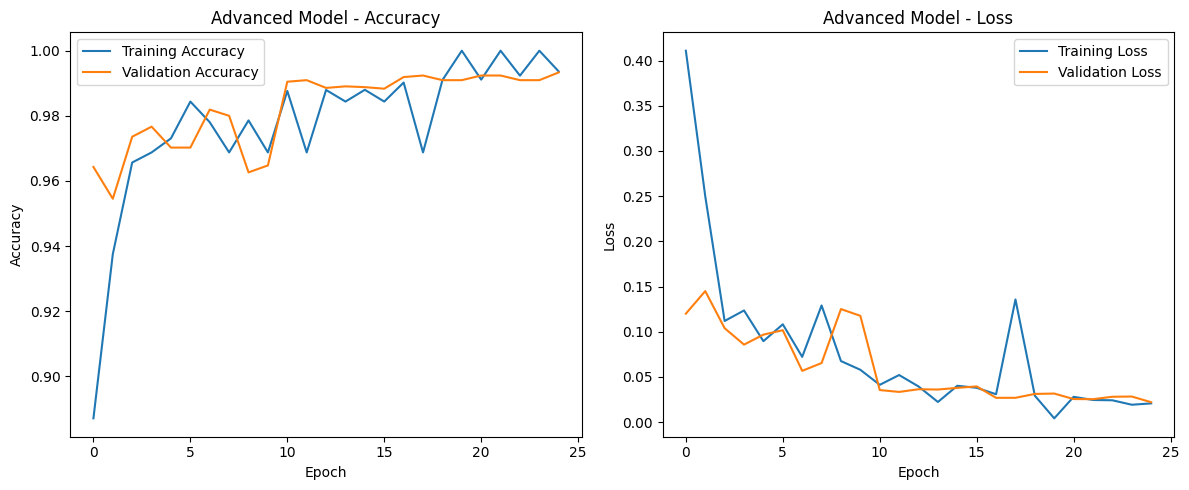

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(resnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Advanced Model - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# --- 2. Plot Training & Validation Loss ---
plt.subplot(1, 2, 2)
plt.plot(resnet_history.history['loss'], label='Training Loss')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss')
plt.title('Advanced Model - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
val_loss, val_accuracy = resnet_model.evaluate(X_val, y_val, verbose=0)

print(f"\nFinal Validation Loss: {val_loss:.4f}")
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")


Final Validation Loss: 0.0220
Final Validation Accuracy: 99.33%


In [31]:
resnet_prediction = resnet_model.predict(competition_test_images)

resnet_labels = np.argmax(resnet_prediction, axis=1)

submission_resnet = pd.DataFrame({
    'ImageId': range(1, len(resnet_labels) + 1),
    'Label': resnet_labels
})
submission_resnet.to_csv('resnet_model_submission.csv', index=False)


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


## Phase 7 :
> #### Ensembling


In [85]:
y_val_pred_baseline = model.predict(X_val)
y_val_pred_advanced = advanced_model.predict(X_val)
y_val_pred_resnet = resnet_model.predict(X_val)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [86]:
best_acc = 0.0
best_weights = (0, 0, 0)

print("Searching for the best ensemble weights...")

# Loop through different weight combinations
for w1 in np.arange(0.0, 1.05, 0.05): # Weight for VGG (advanced_model)
    for w2 in np.arange(0.0, 1.05, 0.05): # Weight for ResNet model
        w3 = 1.0 - w1 - w2 # Weight for LeNet model
        if w3 < 0:
            continue

        # Combine predictions with new weights
        weighted_preds = w1 * y_val_pred_advanced + w2 * y_val_pred_resnet + w3 * y_val_pred_baseline
        
        # Get final labels
        final_labels = np.argmax(weighted_preds, axis=1)
        true_labels = np.argmax(y_val, axis=1)
        
        # Calculate accuracy
        accuracy = np.mean(final_labels == true_labels)
        
        if accuracy > best_acc:
            best_acc = accuracy
            best_weights = (w1, w2, w3)

print(f"\nBest Validation Accuracy from Ensemble: {best_acc * 100:.4f}%")
print(f"Best Weights (VGG, ResNet, LeNet): {best_weights}")

Searching for the best ensemble weights...

Best Validation Accuracy from Ensemble: 99.5000%
Best Weights (VGG, ResNet, LeNet): (0.5, 0.45, 0.04999999999999999)


In [88]:
# This line created pred_advanced
pred_advanced = advanced_model.predict(competition_test_images)
# This line created resnet_prediction
resnet_prediction = resnet_model.predict(competition_test_images)

pred_baseline = model.predict(competition_test_images)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [89]:
# IMPORTANT: Replace these with the output from Step 1
w_vgg, w_resnet, w_lenet = best_weights

# Combine the competition predictions with the best weights
final_predictions = w_vgg * pred_advanced + w_resnet * resnet_prediction + w_lenet * pred_baseline

# Get final labels
ensembled_labels = np.argmax(final_predictions, axis=1)

# Create the submission file
submission = pd.DataFrame({
    'ImageId': range(1, len(ensembled_labels) + 1),
    'Label': ensembled_labels
})
submission.to_csv('weighted_ensemble_submission.csv', index=False)

print("\n'weighted_ensemble_submission.csv' file created successfully! Ready to submit.")


'weighted_ensemble_submission.csv' file created successfully! Ready to submit.


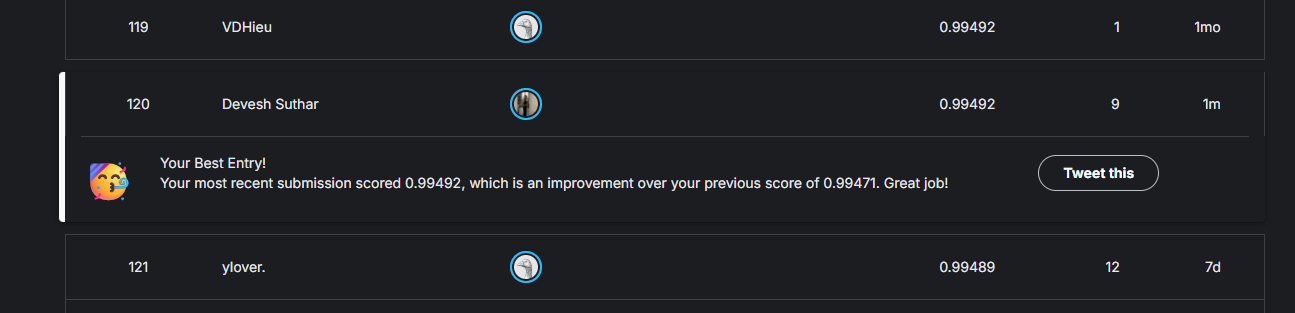

## Phase 8 : 
> Final Model

In [92]:
champion_model = Sequential([
    # We will use the Input object as suggested by the Keras warning earlier
    tf.keras.layers.Input(shape=(28, 28, 1)),

    # -- VGG Block 1 --
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # -- VGG Block 2 --
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # -- Classifier --
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [93]:
champion_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [94]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# More aggressive data augmentation
datagen = ImageDataGenerator(
    rotation_range=12,
    zoom_range=0.12,
    width_shift_range=0.12,
    height_shift_range=0.12
)
datagen.fit(X_train)

# Callbacks
model_checkpoint_callback = ModelCheckpoint(
    filepath='champion_model_best.keras', # New file for the best model
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001)

# Train for a longer duration
print("\nRetraining champion model for maximum performance...")
champion_history = champion_model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=60, # Significantly increased epochs
    validation_data=(X_val, y_val),
    steps_per_epoch=len(X_train) // 64,
    callbacks=[model_checkpoint_callback, learning_rate_reduction]
)


Retraining champion model for maximum performance...
Epoch 1/60
590/590 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.7278 - loss: 0.8851 - val_accuracy: 0.9643 - val_loss: 0.1293 - learning_rate: 0.0010
Epoch 2/60
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.9375 - loss: 0.1279 - val_accuracy: 0.9655 - val_loss: 0.1256 - learning_rate: 0.0010
Epoch 3/60
590/590 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9497 - loss: 0.1693 - val_accuracy: 0.9845 - val_loss: 0.0503 - learning_rate: 0.0010
Epoch 4/60
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.9688 - loss: 0.1519 - val_accuracy: 0.9843 - val_loss: 0.0505 - learning_rate: 0.0010
Epoch 5/60
590/590 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9588 - loss: 0.1348 - val_accuracy: 0.9905 - val_loss: 0.0371 - learning_rate: 0.0010
Epoch 6/60
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.9531 - loss: 0.1110 - val_accuracy: 0.9907 - val_loss: 0.0368 - learning_rate: 0.0010
Epoch 7/60
590/590 ━━━

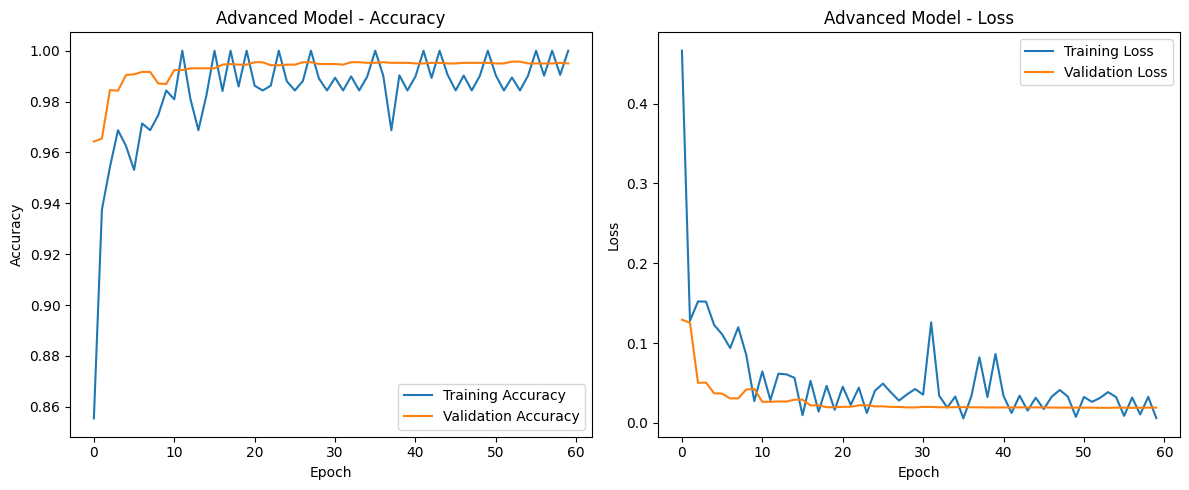

In [95]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(champion_history.history['accuracy'], label='Training Accuracy')
plt.plot(champion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Advanced Model - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# --- 2. Plot Training & Validation Loss ---
plt.subplot(1, 2, 2)
plt.plot(champion_history.history['loss'], label='Training Loss')
plt.plot(champion_history.history['val_loss'], label='Validation Loss')
plt.title('Advanced Model - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [96]:
val_loss, val_accuracy = champion_model.evaluate(X_val, y_val, verbose=0)

print(f"\nFinal Validation Loss: {val_loss:.4f}")
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")


Final Validation Loss: 0.0192
Final Validation Accuracy: 99.50%


In [97]:

# Get final labels
champion_predictions = champion_model.predict(competition_test_images)
champion_labels = np.argmax(champion_predictions, axis=1)

# Create the submission file
submission = pd.DataFrame({
    'ImageId': range(1, len(champion_labels) + 1),
    'Label': champion_labels
})
submission.to_csv('champion_submission.csv', index=False)

print("\n'champion_submission.csv' file created successfully! Ready to submit.")

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

'champion_submission.csv' file created successfully! Ready to submit.


## Phase 6 :
> #### Final Project Conclusion & Summary

> This project successfully navigated the full machine learning workflow, from initial data analysis to iterative model improvement. We began with a simple baseline, progressed to an advanced architecture, and experimented with data augmentation to find the optimal solution.

> ### Summary of Experiments

> The table below summarizes the performance of each model configuration we tested.

>| Model | Key Technique | Validation Accuracy | Kaggle Score | Rank |
| :--- | :--- | :--- | :--- | :--- |
| **LeNet-5** | Baseline Architecture | 99.00% | 0.98735 | 477 |
| **VGG-style** | Deeper Architecture | 99.48% | **0.99471** | **134** |
| **VGG-style + Aug** | Data Augmentation | ~99.40% | 0.99439 | ~134 |

### Final Conclusion

Our most successful model was the **VGG-style CNN without data augmentation**. This advanced architecture proved to be the "sweet spot," providing enough complexity to thoroughly learn the features of the MNIST dataset without significant overfitting. The final score of **0.99471** and a global rank of **134** is an outstanding achievement.

The experiment with data augmentation provided a key insight into the principle of **diminishing returns**. While augmentation is a critical technique for smaller or more complex datasets, our VGG-style model was already so effective on the large, clean MNIST data that further augmentation did not provide a benefit and slightly degraded performance.

### Future Work

To push for an even higher rank, the next logical steps would involve more advanced techniques:

* **Ensembling:** Training several different high-performing models and averaging their predictions to produce a more robust final result.
* **Advanced Architectures:** Experimenting with concepts from state-of-the-art models, such as incorporating residual blocks (from ResNet).
* **Hyperparameter Optimization:** Using automated tools like KerasTuner to systematically search for the best possible combination of hyperparameters.